# Credit risk scoring project

- Dataset: https://github.com/gastonstat/CreditScoring

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data cleaning and preparation
- Downloading the dataset
- Re-encoding the categorical variables
- Doing the train/validation/test split

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv')

In [112]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [113]:
df.columns = df.columns.str.lower()

In [114]:
status_values = {
    1 : "ok",
    2 : "default",
    0 : "unk"
}
df.status = df.status.map(status_values)

In [115]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [116]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [117]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [118]:
df = df[df.status != "unk"].reset_index(drop=True)

In [119]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,763488.0,1060578.0,404473.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8704595.0,10218704.0,6344963.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [120]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].fillna(df[c].mean()).replace(99999999.0, df[c].mean())

In [121]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,5958.0,16539.0,1976.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,66447.0,108444.0,25672.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,763488.0,1060578.0,404473.0,5000.0,11140.0


In [122]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

del df_train['status']
del df_val['status']
del df_test['status']

In [123]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


#Decision trees

- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [124]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [125]:
xi = df_train.iloc[0].to_dict()

In [126]:
assess_risk(xi)

'ok'

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [128]:
dict_train = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6500145310116004

In [129]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

- There is a case of overfitting here. So lets deal with it.

In [130]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [131]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(f'train: {auc}')

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f'val: {auc}')

train: 0.7054989859726213
val: 0.6685264343319367


In [132]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Decision tree learning algorithm

- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [133]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [134]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [135]:
from IPython.display import display

In [136]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    display(df_left.status.value_counts(normalize=True))
    display(df_right)
    display(df_right.status.value_counts(normalize=True))
    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64

,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64


3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64


4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64


5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64

,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64


8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64

In [137]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [138]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [139]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [140]:
for feature, Ts in thresholds.items():
    print(feature)

    for T in Ts:
        print(T)
        df_left = df_example[df_example.assets <= T]
        df_right = df_example[df_example.assets > T]

        display(df_left)
        display(df_left.status.value_counts(normalize=True))
        display(df_right)
        display(df_right.status.value_counts(normalize=True))
        print()

assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64


3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64


4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64


5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64


8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


debt
500


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


1000


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64

,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

#Decision trees parameter tuning

- selecting `max_depth`
- selecting `min_samples_leaf`

In [141]:
depth = [1, 2, 3, 4, 5, 6, 10, 15, 20, 30, None]

for d in depth:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(d, '->', auc.round(3))

1 -> 0.606
2 -> 0.669
3 -> 0.734
4 -> 0.753
5 -> 0.755
6 -> 0.742
10 -> 0.67
15 -> 0.678
20 -> 0.64
30 -> 0.652
None -> 0.64


In [142]:
scores = []
depth = [4, 5, 6]
samples = [1, 5, 10, 15, 20, 30, 50, 100, 500]
for d in depth:
    for s in samples:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))

In [143]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc'])
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.753412
1,4,5,0.753412
2,4,10,0.753412
3,4,15,0.756127
4,4,20,0.758228
5,4,30,0.755404
6,4,50,0.753291
7,4,100,0.751962
8,4,500,0.679140
9,5,1,0.754680


In [144]:
df_scores_pivot = df_scores.pivot(index = ['min_samples_leaf'], columns= ['max_depth'], values= ['auc'])
df_scores_pivot

auc                    
max_depth                4         5         6
min_samples_leaf                              
1                 0.753412  0.754680  0.752210
5                 0.753412  0.759475  0.747000
10                0.753412  0.759527  0.759739
15                0.756127  0.757456  0.773822
20                0.758228  0.762006  0.767134
30                0.755404  0.767271  0.763384
50                0.753291  0.765248  0.764543
100               0.751962  0.767607  0.776422
500               0.679140  0.679140  0.679140

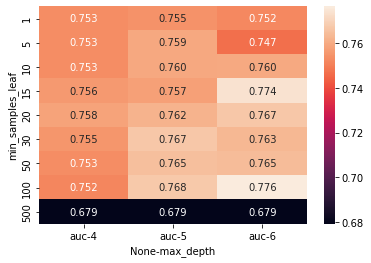

In [145]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [146]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

In [147]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 1185.00
|   |   |   |--- class: 1
|   |   |--- amount >  1185.00
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- seniority <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  2.50
|   |   |   |   |--- assets <= 3586.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- assets >  3586.00
|   |   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- assets >  3326.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  1330.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- seniority >  5.50
|   |   |   |   |--- income <= 114.50
|   |   |   |   |   |--- expenses <= 45.50
|   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Ensembles and random forest

- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [150]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7799581022498849

In [151]:
scores= []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [152]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.785347
1,20,0.790493
2,30,0.795972
3,40,0.801930
4,50,0.805351
5,60,0.806380
6,70,0.810252
7,80,0.813573
8,90,0.816298
9,100,0.816068


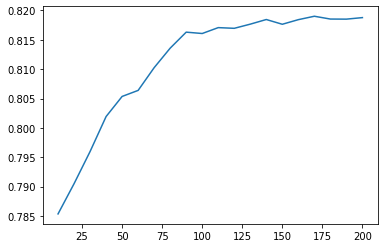

In [153]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [154]:
scores= []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, n, auc))

In [155]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'n_estimators', 'auc'])

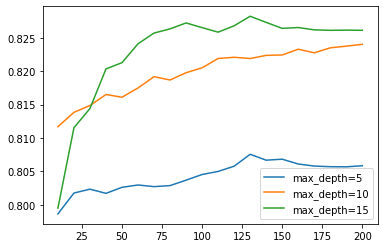

In [156]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc, label= 'max_depth=%d' % d)

plt.legend()

In [157]:
max_depth = 15

In [158]:
scores= []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((s, n, auc))

In [159]:
df_scores = pd.DataFrame(scores, columns = ['min_samples_leaf', 'n_estimators', 'auc'])

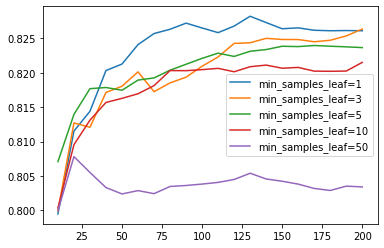

In [160]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc, label= 'min_samples_leaf=%d' % s)

plt.legend()

In [161]:
min_samples_leaf = 1

In [162]:
rf = RandomForestClassifier(n_estimators=130, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=130, random_state=1)

Other useful parametes:

- `max_features`
- `bootstrap`

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#Gradient boosting and XGBoost

- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

In [163]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
import xgboost as xgb

In [165]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label= y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [166]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [167]:
y_pred = model.predict(dval)

In [168]:
roc_auc_score(y_val, y_pred)

0.810745683078637

In [169]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [170]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [171]:
s = output.stdout

In [172]:
print(s)

[0]	train-auc:0.85894	val-auc:0.760344
[5]	train-auc:0.928978	val-auc:0.80352
[10]	train-auc:0.954123	val-auc:0.81146
[15]	train-auc:0.966634	val-auc:0.816213
[20]	train-auc:0.974593	val-auc:0.820018
[25]	train-auc:0.981832	val-auc:0.819582
[30]	train-auc:0.988379	val-auc:0.815726
[35]	train-auc:0.991603	val-auc:0.81469
[40]	train-auc:0.993628	val-auc:0.814164
[45]	train-auc:0.995738	val-auc:0.811499
[50]	train-auc:0.997512	val-auc:0.811948
[55]	train-auc:0.998179	val-auc:0.810264
[60]	train-auc:0.998736	val-auc:0.810234
[65]	train-auc:0.99912	val-auc:0.808375
[70]	train-auc:0.999561	val-auc:0.809308
[75]	train-auc:0.999781	val-auc:0.806196
[80]	train-auc:0.99987	val-auc:0.80711
[85]	train-auc:0.999913	val-auc:0.807667
[90]	train-auc:0.999943	val-auc:0.807061
[95]	train-auc:0.999977	val-auc:0.806819
[100]	train-auc:0.999986	val-auc:0.808091
[105]	train-auc:0.999992	val-auc:0.807364
[110]	train-auc:0.999997	val-auc:0.808969
[115]	train-auc:0.999998	val-auc:0.808751
[120]	train-auc:1	val

In [175]:
def parse_xgb_output(s):
    results =[]

    for line in s.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
        df_score = pd.DataFrame(results, columns= ['num_iter', 'train_auc', 'val_auc'])
    return df_score

In [176]:
df_score = parse_xgb_output(s)

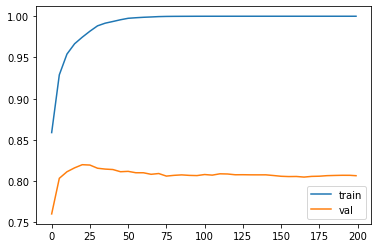

In [177]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

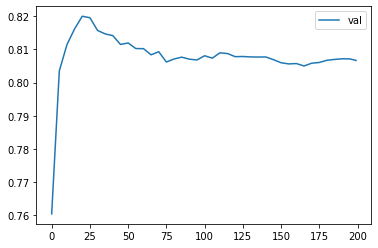

In [178]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

#XGBoost parameter tuning

- Tuning the following parameters:

- `eta`
- `max_depth`
- `min_child_weight`

In [186]:
etas = [0.01, 0.1, 0.3]

scores = {}

In [187]:
%%capture output

xgb_params = {
    'eta' : 0.01,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [188]:
key = ('eta=%s' % xgb_params['eta'])
scores[key] = parse_xgb_output(output.stdout)

In [189]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [190]:
key = ('eta=%s' % xgb_params['eta'])
scores[key] = parse_xgb_output(output.stdout)

In [191]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [192]:
key = ('eta=%s' % xgb_params['eta'])
scores[key] = parse_xgb_output(output.stdout)

In [199]:
print(list(scores.keys()))

['eta=0.01', 'eta=0.1', 'eta=0.3']


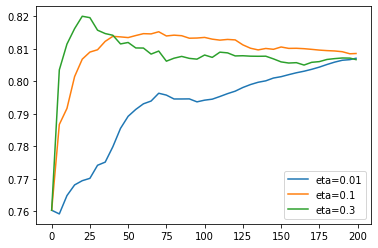

In [201]:
for eta in list(scores.keys()):
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

- Best option for `eta` is 0.3

In [202]:
scores = {}

In [203]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [204]:
key = ('max_depth=%s' % xgb_params['max_depth'])
scores[key] = parse_xgb_output(output.stdout)

In [205]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 3,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [206]:
key = ('max_depth=%s' % xgb_params['max_depth'])
scores[key] = parse_xgb_output(output.stdout)

In [207]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 4,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [208]:
key = ('max_depth=%s' % xgb_params['max_depth'])
scores[key] = parse_xgb_output(output.stdout)

In [209]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 10,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [210]:
key = ('max_depth=%s' % xgb_params['max_depth'])
scores[key] = parse_xgb_output(output.stdout)

In [211]:
print(list(scores.keys()))

['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10']


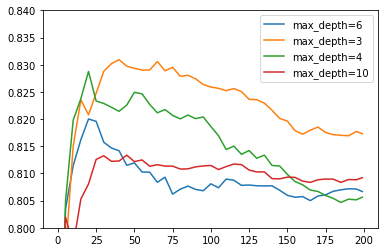

In [215]:
for max_depth in list(scores.keys()):
    df_score = scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.8, 0.84)
plt.legend()

- Best option for `max_depth` is 3.

In [216]:
scores = {}

In [217]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 3,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [218]:
key = ('min_child_weight=%s' % xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output.stdout)

In [220]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 3,
    'min_child_weight' : 10,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [221]:
key = ('min_child_weight=%s' % xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output.stdout)

In [222]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 3,
    'min_child_weight' : 30,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval= 5, evals=watchlist)

In [223]:
key = ('min_child_weight=%s' % xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output.stdout)

In [224]:
print(list(scores.keys()))

['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30']


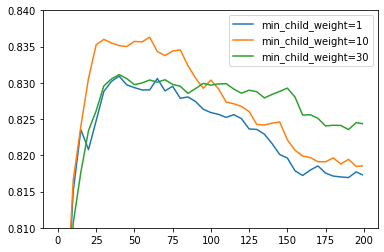

In [227]:
for min_child_weight in list(scores.keys()):
    df_score = scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.81, 0.84)
plt.legend()

- Best option for `min_child_weight` is 10.

In [228]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 3,
    'min_child_weight' : 10,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=60)

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful ones:

- `subsample` and `colsample_bytree`
- `lambda` and `alpha`

#Selecting the final model

- Choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

In [229]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

In [230]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7764222227604078

In [232]:
rf = RandomForestClassifier(n_estimators=130, max_depth=15, min_samples_leaf=1, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=130, random_state=1)

In [233]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8282192245283475

In [234]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 3,
    'min_child_weight' : 10,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=60)

In [236]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8357541595020708

- Out of three models, XGBoost has good performance.

In [240]:
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = (df_full_train.status == 'default').astype(int).values

del df_full_train['status']

In [241]:
dict_full_train = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(dict_full_train)

dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)

In [242]:
dfulltrain = xgb.DMatrix(X_full_train, label= y_full_train, feature_names= dv.get_feature_names_out())

dtest = xgb.DMatrix(X_test, feature_names= dv.get_feature_names_out())

In [243]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 3,
    'min_child_weight' : 10,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=60)

In [245]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8222105468940911